In [1]:
import pandas as pd

# Load the dataset
file_path = r'D:\Athul Project\Data\innercity.xlsx'
dataset = pd.read_excel(file_path)

# Print the first 5 records of the dataset
print(dataset.head())



          cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    

In [2]:
# Check the dataset shape
dataset_shape = dataset.shape
print(dataset_shape)


(21613, 23)


In [3]:
# Identify categorical columns
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

# Identify integer columns
int_ = (dataset.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

# Identify float columns
fl = (dataset.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 7
Integer variables: 4
Float variables: 12


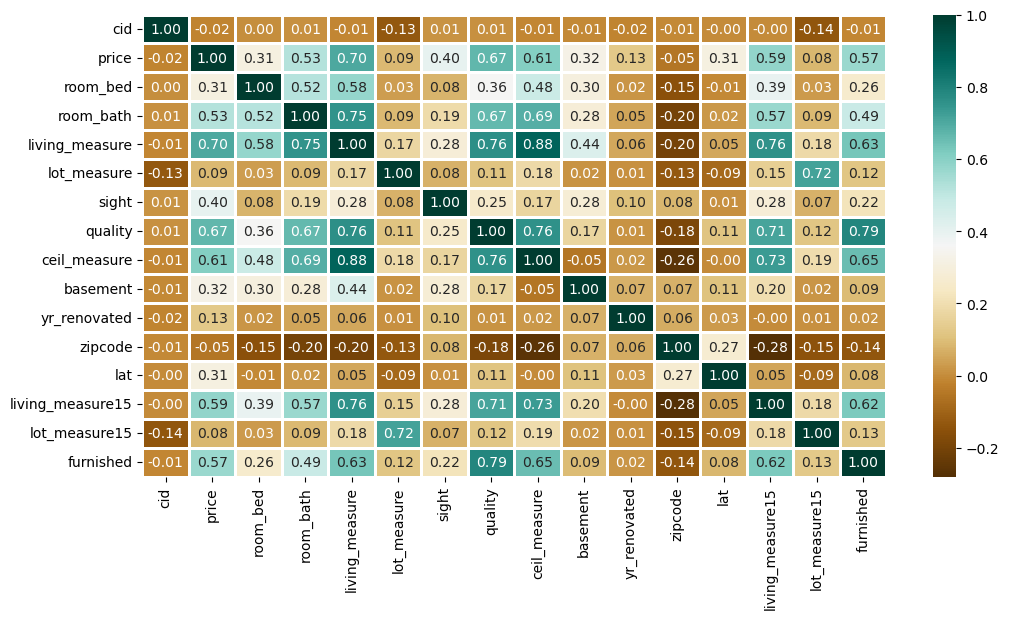

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Generate a correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()


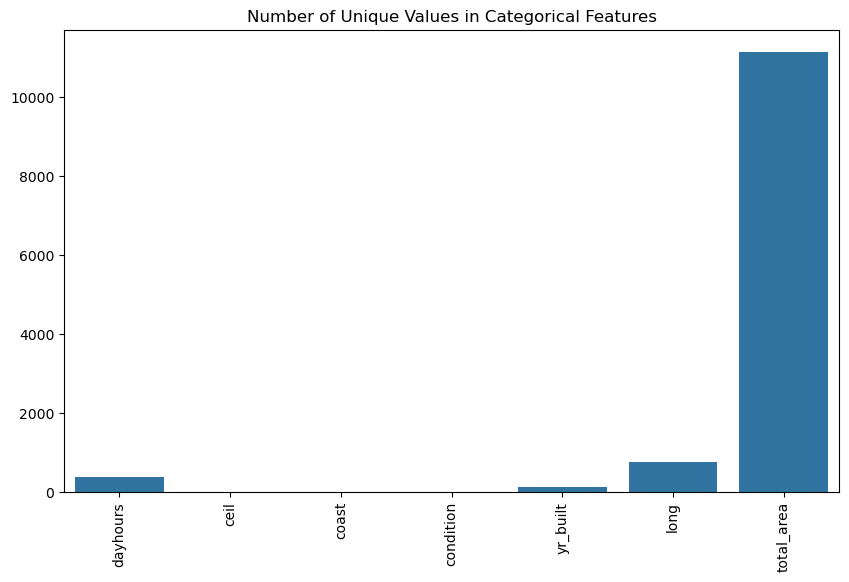

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values count for each categorical column
unique_values = [dataset[col].nunique() for col in object_cols]

# Plot the number of unique values for each categorical feature
plt.figure(figsize=(10, 6))
plt.title('Number of Unique Values in Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)
plt.show()


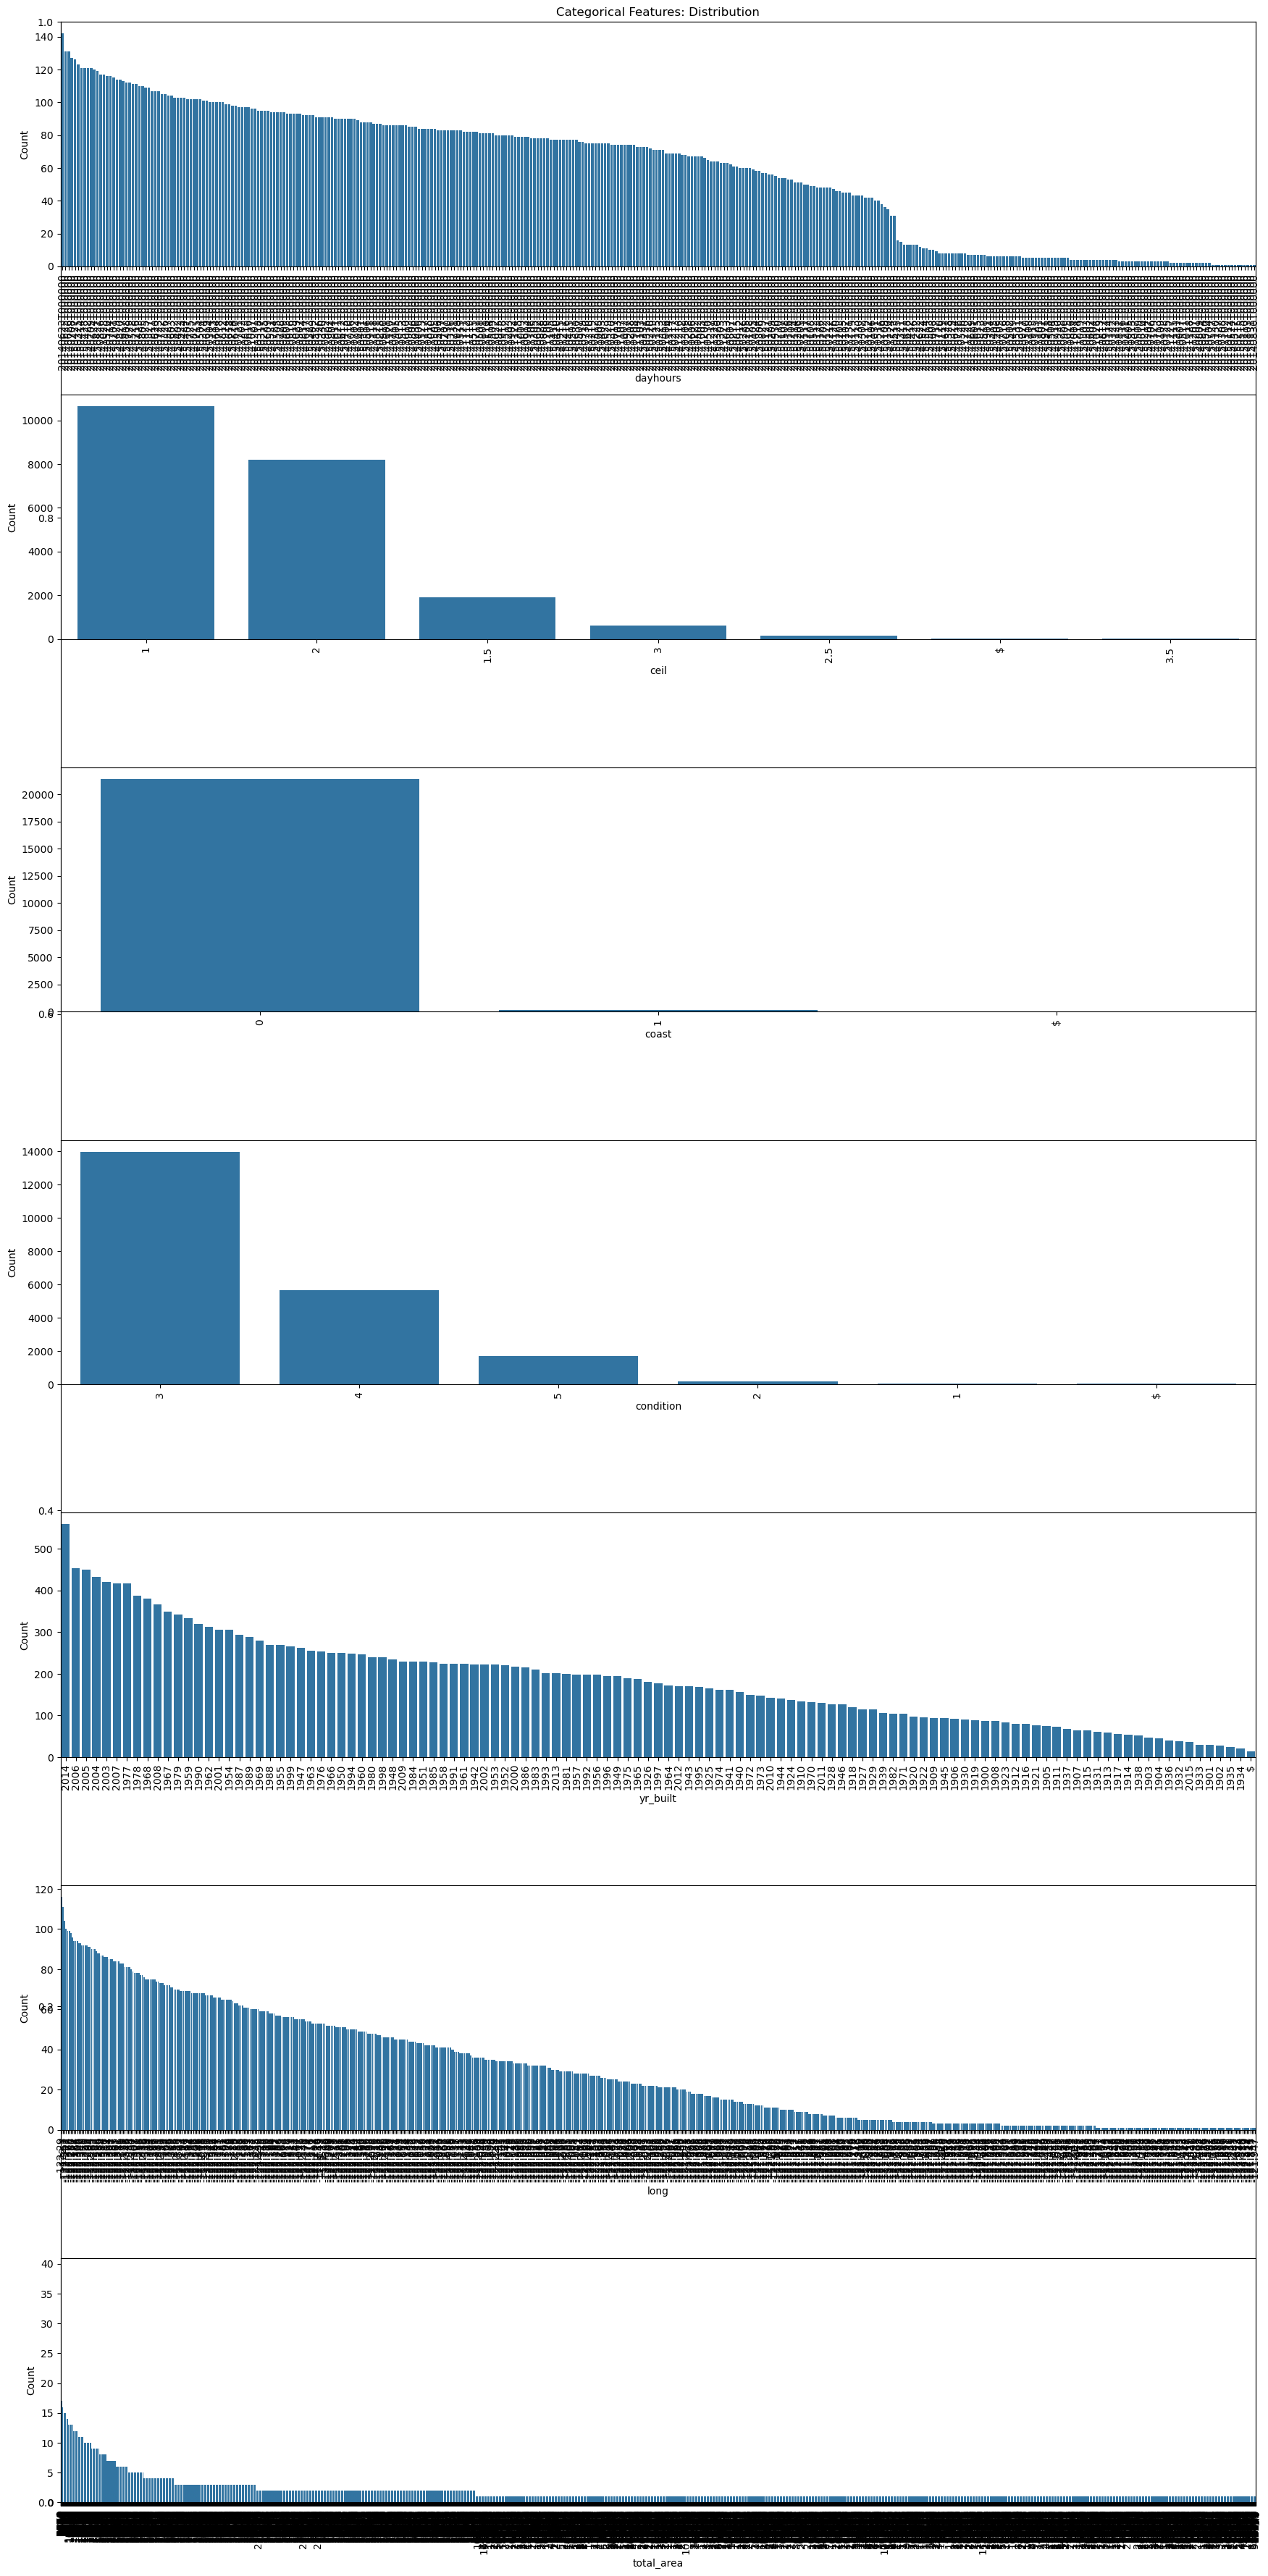

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of categorical features
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    plt.subplot(len(object_cols), 1, index)
    y = dataset[col].value_counts()
    sns.barplot(x=list(y.index), y=y)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    index += 1

plt.tight_layout()
plt.show()


In [7]:
# Drop unnecessary columns
dataset.drop(['cid'], axis=1, inplace=True)

# Display the first few rows to confirm the column drop
print(dataset.head())


          dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
0  20150427T000000  600000       4.0       1.75          3050.0       9440.0   
1  20150317T000000  190000       2.0       1.00           670.0       3101.0   
2  20140820T000000  735000       4.0       2.75          3040.0       2415.0   
3  20141010T000000  257000       3.0       2.50          1740.0       3721.0   
4  20150218T000000  450000       2.0       1.00          1120.0       4590.0   

  ceil coast  sight condition  ...  basement  yr_built  yr_renovated zipcode  \
0    1     0    0.0         3  ...    1250.0      1966             0   98034   
1    1     0    0.0         4  ...       0.0      1948             0   98118   
2    2     1    4.0         3  ...       0.0      1966             0   98118   
3    2     0    0.0         3  ...       0.0      2009             0   98002   
4    1     0    0.0         3  ...       0.0      1924             0   98118   

       lat     long  living_measure15 

In [8]:
# Fill missing values in the target variable 'price' with the mean
dataset['price'] = dataset['price'].fillna(dataset['price'].mean())

# Verify that there are no missing values in the target variable
print(dataset['price'].isnull().sum())


0


In [9]:
# Drop rows with any remaining missing values
new_dataset = dataset.dropna()

# Verify that there are no missing values in the dataset
print(new_dataset.isnull().sum())


dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64


In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)
print('Number of categorical features:', len(object_cols))

# Convert all values in the categorical columns to strings
new_dataset[object_cols] = new_dataset[object_cols].astype(str)

# One-Hot Encoding of Categorical Variables
OH_encoder = OneHotEncoder(sparse_output=False, drop='first')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

# Set column names for one-hot encoded columns
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

# Drop the original categorical columns
df_final = new_dataset.drop(object_cols, axis=1)

# Concatenate the original dataframe with the one-hot encoded columns
df_final = pd.concat([df_final, OH_cols], axis=1)

# Display the first few rows of the final dataframe
print(df_final.head())


Categorical variables: ['dayhours', 'ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']
Number of categorical features: 7


C:\Users\rithi\AppData\Local\Temp\ipykernel_6996\1774406877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[object_cols] = new_dataset[object_cols].astype(str)


    price  room_bed  room_bath  living_measure  lot_measure  sight  quality  \
0  600000       4.0       1.75          3050.0       9440.0    0.0      8.0   
1  190000       2.0       1.00           670.0       3101.0    0.0      6.0   
2  735000       4.0       2.75          3040.0       2415.0    4.0      8.0   
3  257000       3.0       2.50          1740.0       3721.0    0.0      8.0   
4  450000       2.0       1.00          1120.0       4590.0    0.0      7.0   

   ceil_measure  basement  yr_renovated  ...  total_area_9985  \
0        1800.0    1250.0             0  ...              0.0   
1         670.0       0.0             0  ...              0.0   
2        3040.0       0.0             0  ...              0.0   
3        1740.0       0.0             0  ...              0.0   
4        1120.0       0.0             0  ...              0.0   

   total_area_9986  total_area_9987  total_area_9989  total_area_9990  \
0              0.0              0.0              0.0         

In [11]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df_final.drop(['price'], axis=1)
Y = df_final['price']

# Split the dataset into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("Y_train shape:", Y_train.shape)
print("Y_valid shape:", Y_valid.shape)


X_train shape: (17109, 12357)
X_valid shape: (4278, 12357)
Y_train shape: (17109,)
Y_valid shape: (4278,)


In [12]:
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error

# Initialize the SVR model
model_SVR = svm.SVR()

# Train the SVR model on the training data
model_SVR.fit(X_train, Y_train)

# Predict the target variable on the validation data
Y_pred_SVR = model_SVR.predict(X_valid)

# Calculate and print the Mean Absolute Percentage Error (MAPE)
svr_mape = mean_absolute_percentage_error(Y_valid, Y_pred_SVR)
print("SVR MAPE:", svr_mape)


SVR MAPE: 0.4250379641473572


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model_RFR = RandomForestRegressor(n_estimators=10)

# Train the RFR model on the training data
model_RFR.fit(X_train, Y_train)

# Predict the target variable on the validation data
Y_pred_RFR = model_RFR.predict(X_valid)

# Calculate and print the Mean Absolute Percentage Error (MAPE)
rfr_mape = mean_absolute_percentage_error(Y_valid, Y_pred_RFR)
print("Random Forest MAPE:", rfr_mape)


Random Forest MAPE: 0.1415007473498051


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Initialize the Linear Regression model
model_LR = LinearRegression()

# Train the Linear Regression model on the training data
model_LR.fit(X_train, Y_train)

# Predict the target variable on the validation data
Y_pred_LR = model_LR.predict(X_valid)

# Calculate and print the Mean Absolute Percentage Error (MAPE)
lr_mape = mean_absolute_percentage_error(Y_valid, Y_pred_LR)
print("Linear Regression MAPE:", lr_mape)


Linear Regression MAPE: 1203.82686078462


In [15]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Initialize the CatBoost Regressor model
cb_model = CatBoostRegressor()

# Train the CatBoost Regressor model on the training data
cb_model.fit(X_train, Y_train)

# Predict the target variable on the validation data
preds = cb_model.predict(X_valid)

# Calculate and print the R^2 score
cb_r2_score = r2_score(Y_valid, preds)
print("CatBoost R^2 Score:", cb_r2_score)


Learning rate set to 0.064125
0:	learn: 354616.3158739	total: 172ms	remaining: 2m 51s
1:	learn: 341675.2431333	total: 216ms	remaining: 1m 47s
2:	learn: 329869.5957676	total: 256ms	remaining: 1m 25s
3:	learn: 318129.2763274	total: 295ms	remaining: 1m 13s
4:	learn: 307478.9705383	total: 339ms	remaining: 1m 7s
5:	learn: 297484.8875400	total: 386ms	remaining: 1m 3s
6:	learn: 288654.3658297	total: 425ms	remaining: 1m
7:	learn: 280018.2519517	total: 468ms	remaining: 58s
8:	learn: 271516.1282215	total: 510ms	remaining: 56.1s
9:	learn: 263945.0796685	total: 555ms	remaining: 55s
10:	learn: 257128.0452117	total: 599ms	remaining: 53.9s
11:	learn: 250244.9127399	total: 644ms	remaining: 53s
12:	learn: 244421.4903407	total: 683ms	remaining: 51.8s
13:	learn: 238780.9835467	total: 727ms	remaining: 51.2s
14:	learn: 233438.3736146	total: 766ms	remaining: 50.3s
15:	learn: 228426.6830640	total: 801ms	remaining: 49.2s
16:	learn: 223184.9185779	total: 844ms	remaining: 48.8s
17:	learn: 218635.8299425	total: 

In [16]:
# Assuming you have already calculated these
svr_mape = mean_absolute_percentage_error(Y_valid, Y_pred_SVR)
rfr_mape = mean_absolute_percentage_error(Y_valid, Y_pred_RFR)
lr_mape = mean_absolute_percentage_error(Y_valid, Y_pred_LR)
cb_r2_score = r2_score(Y_valid, preds)

print("SVR MAPE:", svr_mape)
print("Random Forest MAPE:", rfr_mape)
print("Linear Regression MAPE:", lr_mape)
print("CatBoost R^2 Score:", cb_r2_score)


SVR MAPE: 0.4250379641473572
Random Forest MAPE: 0.1415007473498051
Linear Regression MAPE: 1203.82686078462
CatBoost R^2 Score: 0.8946347332955903


living_measure      0.246662
quality             0.209005
lat                 0.156732
furnished           0.131897
zipcode             0.052623
coast_1             0.027558
living_measure15    0.026288
sight               0.020407
ceil_measure        0.014271
lot_measure         0.013336
dtype: float64


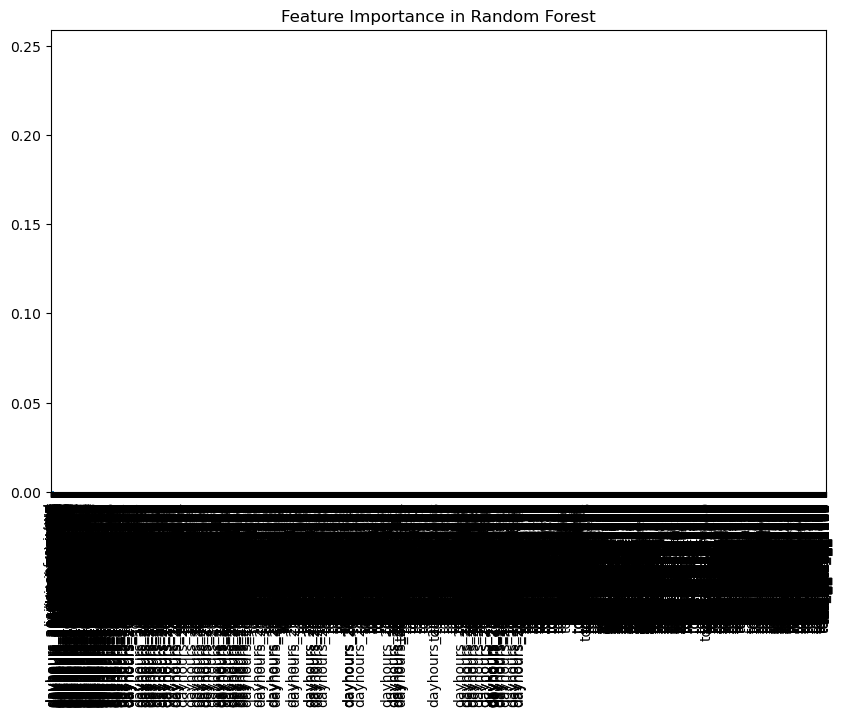

lat                 30.672395
living_measure      17.318194
zipcode             11.837027
quality             11.195583
sight                4.158630
furnished            3.809709
living_measure15     3.783039
ceil_measure         3.520205
coast_1              3.474463
basement             1.826210
dtype: float64


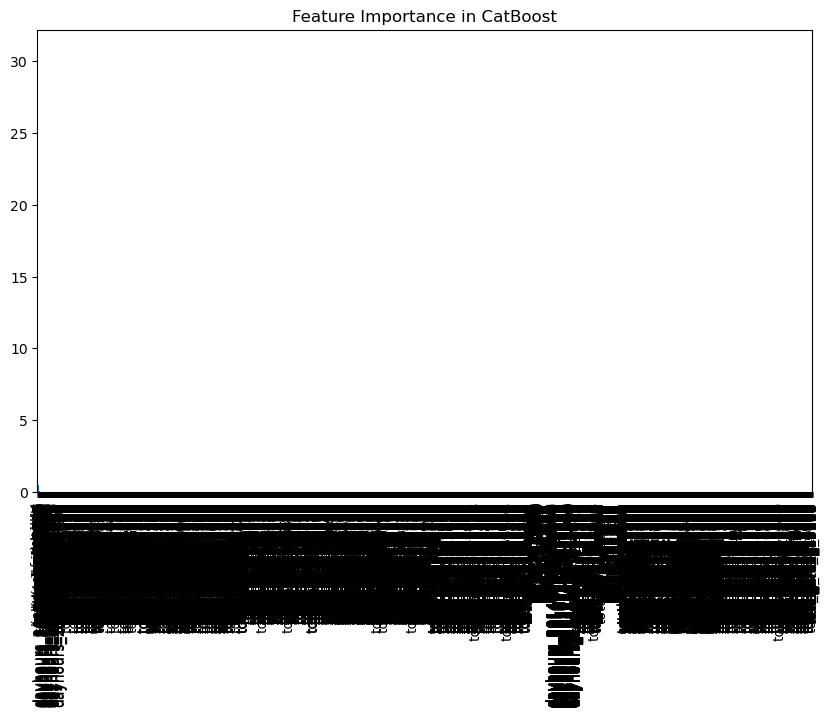

In [18]:
# Feature importance for Random Forest
importances = model_RFR.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(forest_importances.head(10))  # Top 10 features

# Plot feature importance
forest_importances.plot(kind='bar', figsize=(10, 6), title="Feature Importance in Random Forest")
plt.show()

# Feature importance for CatBoost
cb_importances = cb_model.get_feature_importance()
cb_feature_importance = pd.Series(cb_importances, index=feature_names).sort_values(ascending=False)

print(cb_feature_importance.head(10))  # Top 10 features

cb_feature_importance.plot(kind='bar', figsize=(10, 6), title="Feature Importance in CatBoost")
plt.show()


In [19]:
import joblib

# Specify the directory where you want to save the model
save_path = r'D:\Athul Project\Model\catboost_model.pkl'

# Save the CatBoost model as a pickle file to the specified directory
joblib.dump(cb_model, save_path)

print(f"Model saved to {save_path}")


Model saved to D:\Athul Project\Model\catboost_model.pkl
